In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [ ]:
!wget -O test.txt https://raw.githubusercontent.com/nehanawar025/Pattern_Recognization_Lab/main/Assignment_2/data.txt

In [ ]:
df = pd.read_csv('test.txt', sep=" " , header = None)
df

In [ ]:
x = df.iloc[:, :]
x = np.array(x)

print(x)

[[ 1.   1. ]
 [ 1.  -1. ]
 [ 4.   5. ]
 [-2.   2.5]
 [ 0.   2. ]
 [ 2.  -3. ]]


In [ ]:
D =  x.ndim
D

In [ ]:
# Given
w1 = 0.5
mean1 = np.array([0., 0.])
variance1 = np.array([[0.25, 0.3],
                                 [0.3, 1]])
w2 = 0.5
mean2 = np.array([2., 2.])
variance2 = np.array([[0.5, 0],
                                  [0, 0.5]])

In [ ]:
# determinent1
var_det1 =  np.linalg.det(variance1)
var_det1

# determinent2
var_det2 =  np.linalg.det(variance2)
var_det2

In [ ]:
# inverse1
var_inv1=np.linalg.inv(variance1)
var_inv1
# inverse2
var_inv2=np.linalg.inv(variance2)
var_inv2

In [ ]:
output1 = np.zeros((x.shape[0],))
for i in range(x.shape[0]):
  X = x[i, :]
  output1[i,] = np.exp(- 0.5 * np.dot(X - mean1, np.dot(var_inv1, (X - mean1).T))) / (((2 * 3.14) ** D) * var_det1) ** 0.5

output1

array([5.22179356e-02, 1.22804814e-03, 4.88635754e-15, 9.53257099e-13,
       1.74908175e-02, 1.70550636e-14])

In [ ]:
# Normal1
normal1=np.zeros((x.shape[0],))
for i in range(x.shape[0]):
  normal1[i,]=output1[i]*w1
normal1

array([2.61089678e-02, 6.14024070e-04, 2.44317877e-15, 4.76628550e-13,
       8.74540876e-03, 8.52753181e-15])

In [ ]:
output2 = np.zeros((x.shape[0],))
for i in range(x.shape[0]):
  X = x[i, :]
  output2[i,] = np.exp(- 0.5 * np.dot(X - mean2, np.dot(var_inv2, (X - mean2).T))) / (((2 * 3.14) ** D) * var_det2) ** 0.5

output2

array([4.31004087e-02, 1.44585764e-05, 7.19850130e-07, 2.79116185e-08,
       5.83300602e-03, 4.42291206e-12])

In [ ]:
# Normal 2
normal2=np.zeros((x.shape[0],))
for i in range(x.shape[0]):
  normal2[i,]=output2[i]*w2
normal2

array([2.15502043e-02, 7.22928818e-06, 3.59925065e-07, 1.39558093e-08,
       2.91650301e-03, 2.21145603e-12])

In [ ]:
# Dataset Classifying
labels = np.zeros(x.shape[0])

for i in range(x.shape[0]):

  print(x[i, :], 'is in', end = ' ')
  if normal1[i] > normal2[i]:
      labels[i] = 1
      print('Class 1')
  else:
      labels[i] = 2
      print('Class 2')

print(labels)

[1. 1.] is in Class 1
[ 1. -1.] is in Class 1
[4. 5.] is in Class 2
[-2.   2.5] is in Class 2
[0. 2.] is in Class 1
[ 2. -3.] is in Class 2
[1. 1. 2. 2. 1. 2.]


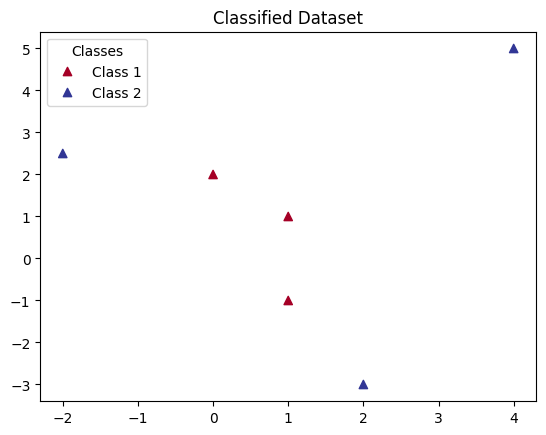

In [ ]:
# Scatter plot
scatter1 = plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='RdYlBu', marker='^')

plt.title('Classified Dataset')

int_labels = [int(label) for label in labels]
classes = sorted(list(set(int_labels)))

legend_labels = [f'Class {cls}' for cls in classes]
plt.legend(handles=scatter1.legend_elements()[0], labels=legend_labels, title='Classes')

plt.show()